In [1]:
#Problem Statements:
#1.What are the top 5 zipcodes for 911 calls?

#2.What are the top 5 townships (twp) for 911 calls?

#3.Take a look at the 'title' column, how many unique title codes are there?

#4.In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

#For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

#5.What is the most common Reason for a 911 call based off of this new column?

#6.Use seaborn to create a countplot of 911 calls by Reason.

#7.Use .apply() to create 3 new columns called Hour, Month, and Day of Week.

#8.Use the .map() with this dictionary to map the actual string names to the day of the week.

#9.Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

#10.Create a simple plot off of the dataframe indicating the count of calls per month.

#** Note - Check if all months are available, if not, then use pandas to get the data

#11.Use seaborn's lmplot() to create a linear fit on the number of calls per month.
#** Note - you may need to reset the index to a column. **

#12.Create a plot of counts of 911 calls, but create 3 separate plots with each plot representing a Reason for the 911 call.

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [3]:
df=pd.read_csv(r"C:\Users\Aj\Downloads\Data sets decodr\911.csv")

In [5]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
#1.What are the top 5 zipcodes for 911 calls?
df.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
#2.What are the top 5 townships (twp) for 911 calls?
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#3.Take a look at the 'title' column, how many unique title codes are there?
df.title.nunique()

110

In [12]:
#In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

#For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

df.title

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [13]:
df['Reasons'] = df.title.apply(lambda title: title.split(':') [0])

In [14]:
#What is the most common Reason for a 911 call based off of this new column?
df.Reasons.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

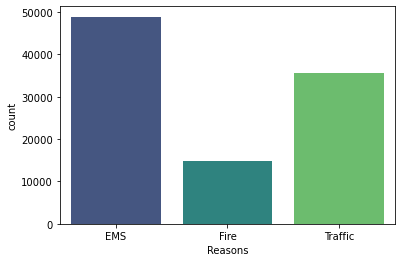

In [15]:
#Use seaborn to create a countplot of 911 calls by Reason.

sns.countplot(x='Reasons',data = df, palette = 'viridis')

In [16]:
#Use .apply() to create 3 new columns called Hour, Month, and Day of Week.
type(df.timeStamp.iloc[0])

str

In [17]:
df.timeStamp = pd.to_datetime(df.timeStamp)
type(df.timeStamp.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df['Hour'] = df.timeStamp.apply(lambda time: time.hour)
df['Month'] = df.timeStamp.apply(lambda time: time.month)
df['Day of Week'] = df.timeStamp.apply(lambda time: time.dayofweek)

In [20]:
#Use the .map() with this dictionary to map the actual string names to the day of the week.

dow = {0: 'Mon',1: 'Tue',2: 'Wed',3: 'Thu',4: 'Fri',5: 'Sat',6: 'Sun' }

In [21]:
df['Day of Week'] = df['Day of Week'].map(dow)

In [22]:
dow

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [23]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

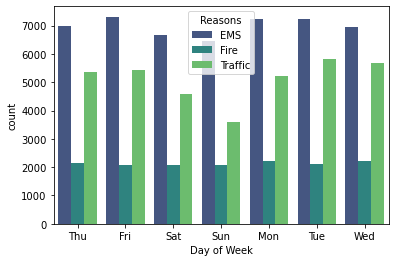

In [24]:
#Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day of Week', hue = 'Reasons', data = df, palette = 'viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

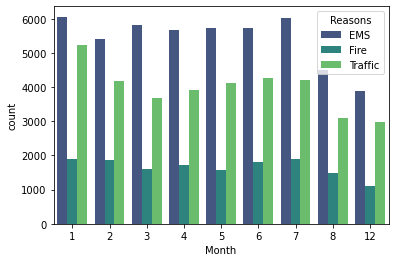

In [25]:
#Create a simple plot off of the dataframe indicating the count of calls per month.
sns.countplot(x='Month', hue = 'Reasons', data = df, palette = 'viridis')

In [26]:
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

In [27]:
df.Month.nunique()

9

In [28]:
#Create a simple plot off of the dataframe indicating the count of calls per month.

#** Note - Check if all months are available, if not, then use pandas to get the data

groupmonth = df.groupby('Month').count()
groupmonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

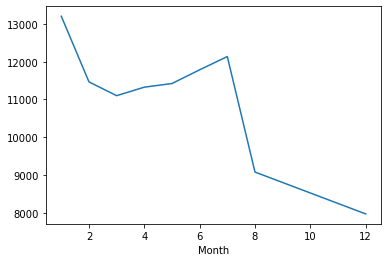

In [29]:
#How many townships have given the highest number of calls to 911 in which month

groupmonth['Reasons'].plot()



In [30]:
# Use seaborn's lmplot() to create a linear fit on the number of calls per month. ** Note - you may need to reset the index to a column. **

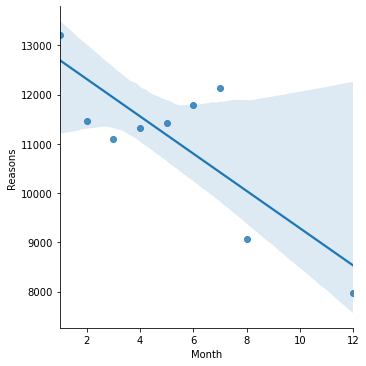

In [31]:
sns.lmplot(x='Month',y = 'Reasons', data = groupmonth.reset_index())


In [32]:
#Create a plot of counts of 911 calls, but create 3 separate plots with each plot representing a Reason for the 911 call.

Text(0.5, 1.0, 'EMS')

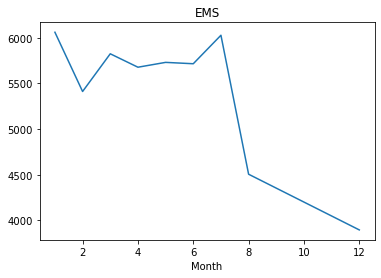

In [33]:
df[df['Reasons']=='EMS'].groupby('Month').count()['twp'].plot()
plt.title('EMS')

<AxesSubplot:xlabel='Month', ylabel='count'>

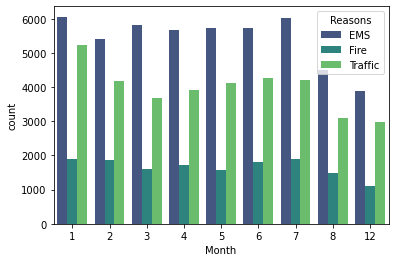

In [34]:
sns.countplot(x='Month', hue = 'Reasons', data = df, palette = 'viridis')

Text(0.5, 1.0, 'Fire')

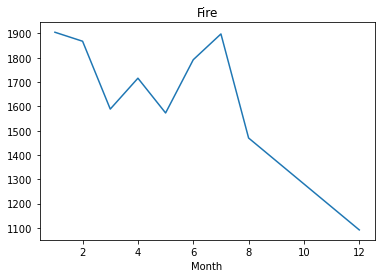

In [35]:
df[df['Reasons']=='Fire'].groupby('Month').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

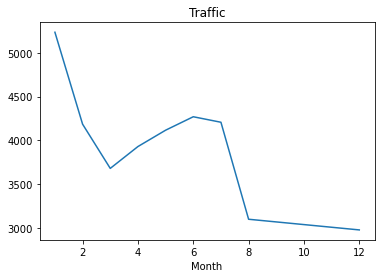

In [36]:
df[df['Reasons']=='Traffic'].groupby('Month').count()['Reasons'].plot()
plt.title('Traffic')

<AxesSubplot:xlabel='Month', ylabel='count'>

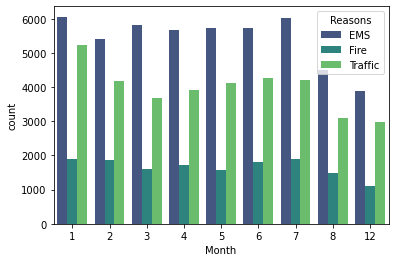

In [37]:
sns.countplot(x='Month', hue = 'Reasons', data = df, palette = 'viridis')